In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
import torch

import numpy as np
import matplotlib.pyplot as plt

root = './data'
    
trans = transforms.Compose([transforms.ToTensor(), 
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_set = dset.MNIST(root=root, train=True, transform=trans, download=True)
test_set = dset.MNIST(root=root, train=False, transform=trans, download=True)

batch_size = 100

train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batch_size,
                 shuffle=True)

test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batch_size,
                shuffle=False)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
    def name(self):
        return "Net"


model = Net()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()

## training
for epoch in range(10):
    ave_loss = 0
    for batch_id, data in enumerate(train_loader):
        optimizer.zero_grad()
        x = Variable(data[0])
        target = Variable(data[1])
        out = model(x)
        loss = criterion(out, target)
        ave_loss = ave_loss * 0.9 + loss.item() * 0.1
        loss.backward()
        optimizer.step()
        if (batch_id+1) % 100 == 0:
            print ('epoch: {}, batch index: {}, train loss: {:.6f}'.format(
                epoch, batch_id+1, ave_loss))

C:\Users\prate\AppData\Local\conda\conda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:66: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


epoch: 0, batch index: 100, train loss: 0.393112
epoch: 0, batch index: 200, train loss: 0.198331
epoch: 0, batch index: 300, train loss: 0.135051
epoch: 0, batch index: 400, train loss: 0.106385
epoch: 0, batch index: 500, train loss: 0.089359
epoch: 0, batch index: 600, train loss: 0.095170
epoch: 1, batch index: 100, train loss: 0.047330
epoch: 1, batch index: 200, train loss: 0.052546
epoch: 1, batch index: 300, train loss: 0.066688
epoch: 1, batch index: 400, train loss: 0.061474
epoch: 1, batch index: 500, train loss: 0.057885
epoch: 1, batch index: 600, train loss: 0.070998
epoch: 2, batch index: 100, train loss: 0.050479
epoch: 2, batch index: 200, train loss: 0.043603
epoch: 2, batch index: 300, train loss: 0.034888
epoch: 2, batch index: 400, train loss: 0.043101
epoch: 2, batch index: 500, train loss: 0.037882
epoch: 2, batch index: 600, train loss: 0.033454
epoch: 3, batch index: 100, train loss: 0.026912
epoch: 3, batch index: 200, train loss: 0.033419
epoch: 3, batch inde

In [5]:
## testing
correct_cnt, ave_loss = 0, 0
total_cnt = 0
with torch.no_grad():
    for batch_id, data in enumerate(test_loader):
        x, target = Variable(data[0]), Variable(data[1])
        out = model(x)
        loss = criterion(out, target)
        _, pred_label = torch.max(out.data, 1)
        total_cnt += x.data.size()[0]
        correct_cnt += (pred_label.data == target.data).sum().item()
        ave_loss = ave_loss * 0.9 + loss.item() * 0.1

print ('test loss: {}, acc: {}'.format(ave_loss, correct_cnt * 100 / total_cnt))

test loss: 0.018569103963311913, acc: 99.15


[7 2 1 0 4] prediction number
[7 2 1 0 4] real number


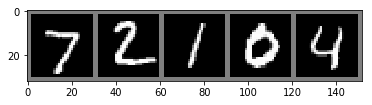

In [14]:
def imshow(img):
    img = img/2 +0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))

##Visualize
testiter = iter(test_loader)
images, labels = testiter.next()
imshow(torchvision.utils.make_grid(images[:5]))
out = model(images[:5])
predicted = torch.max(out, 1)[1].data.numpy().squeeze()
print(predicted, 'prediction number')
print(labels[:5].numpy(), 'real number')